# Metrics_Hotel_Search_Data

The goal of this project is to parse a sequence of URLs about user searches and extract some basic info out of it.

### Challenge Description 

Company XYZ is a Online Travel Agent site, such as Expedia, Booking.com, etc.

They haven’t invested in data science yet and all the data they have about user searches are simply stored in the URLs the users generate when they search for a hotel. If you are not familiar with URLs, you can run a search on any OTA site and see how all search parameters are always present in the URL.

You are asked to: 
+ Create a clean data set where each column is a ﬁeld in the URL, each row is a given search and the cells are the corresponding URL values. 

+ For each search query, how many amenities were selected? 

+ Often, to measure the quality of a search algorithm, data scientists use some metric based on how often users click on the second page, third page, and so on. The idea here is that a great search algorithm should return all interesting results on the ﬁrst page and never force users to visit the other pages (how often do you click on the second page results when you search on Google? Almost never, right?). __Create a metric based on the above idea and ﬁnd the city with the worst search algorithm.__


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import os
import re

# os.getcwd()
# os.listdir()

In [2]:
# os.listdir('.\\Data')

## Import data file: url_list.txt

In [3]:
with open('./Data/url_list.txt', 'r') as f:
#     line = f.read(10) # read 10 characters
#     line = f.read() # read the whole content
    for _ in range(10):
        line = f.readline()
        print(line)

http://www.mysearchforhotels.com/shop/hotelsearch?hotel.checkin=2015-09-19&hotel.stars_4=yes&hotel.min_score=4&hotel.adults=3&hotel.city=New+York,+NY,+United+States&hotel.checkout=2015-09-20&hotel.search_page=1

http://www.mysearchforhotels.com/shop/hotelsearch?hotel.checkin=2015-09-14&hotel.stars_3=yes&hotel.min_score=4&hotel.adults=3&hotel.city=London,+United+Kingdom&hotel.checkout=2015-09-15&hotel.search_page=1

http://www.mysearchforhotels.com/shop/hotelsearch?hotel.checkin=2015-09-26&hotel.customMaximumPriceFilter=175&hotel.stars_4=yes&hotel.min_score=5&hotel.adults=2&hotel.city=New+York,+NY,+United+States&hotel.checkout=2015-09-27&hotel.search_page=1

http://www.mysearchforhotels.com/shop/hotelsearch?hotel.checkin=2015-09-02&hotel.stars_5=yes&hotel.stars_4=yes&hotel.min_score=4&hotel.adults=1&hotel.city=Hong+Kong,+Hong+Kong&hotel.checkout=2015-09-03&hotel.search_page=1

http://www.mysearchforhotels.com/shop/hotelsearch?hotel.checkin=2015-09-20&hotel.customMaximumPriceFilter=275&h

+ read data file
+ check several URLs

In [4]:
pattern = re.compile('hotel.checkin=(.*?)&.*?')
re.findall(pattern, line)

['2015-09-25']

Test using re package to extract required information

In [5]:
features = ['checkin', 'checkout', 'customMinimumPriceFilter', 'customMaximumPriceFilter', 'freeCancellation', 
            'stars_5', 'stars_4', 'stars_3', 'stars_2', 'stars_1', 'max_score', 'min_score', 'couponCode', 'adults', 
            'city', 'children', 'amenities', 'search_page']

In [6]:
with open('./Data/url_list.txt', 'r') as f:
#     line = f.read(10) # read 10 characters
#     line = f.read() # read the whole content
    lines = f.readlines()
    len_lines = len(lines)
    
    col_data = {}

    for feature in features:
        col_data[feature] = [np.nan] * len_lines

    for idx, line in enumerate(lines):
        for feature in features:
            pattern = re.compile('hotel.'+feature+'=(.*?)[&\n].*?')
            result = re.findall(pattern, line)
            if len(result) > 0:
                if feature == 'city':
                    col_data[feature][idx] = result[0].replace('+', ' ')
                else:
                    # original code
                    # col_data[feature][idx] = result[0] 
                    
                    # in case there are more than one result in the URL
                    col_data[feature][idx] = ','.join(result)
                # print the url when there are more than one search result for each feature
                if len(result) > 1:
                    print(line)
                    print(result)
    
    Search_Data = pd.DataFrame(data=col_data)

http://www.mysearchforhotels.com/shop/hotelsearch?hotel.checkin=2015-09-04&hotel.freeCancellation=yes&hotel.min_score=4&hotel.adults=2&hotel.city=New+York,+NY,+United+States&hotel.amenities=yes_smoking&hotel.amenities=yes_pet&hotel.checkout=2015-09-05&hotel.search_page=1

['yes_smoking', 'yes_pet']
http://www.mysearchforhotels.com/shop/hotelsearch?hotel.checkin=2015-09-22&hotel.min_score=5&hotel.adults=2&hotel.city=San+Francisco,+California,+United+States&hotel.amenities=breakfast&hotel.amenities=yes_pet&hotel.checkout=2015-09-29&hotel.search_page=1

['breakfast', 'yes_pet']
http://www.mysearchforhotels.com/shop/hotelsearch?hotel.checkin=2015-09-26&hotel.min_score=5&hotel.adults=2&hotel.city=New+York,+NY,+United+States&hotel.amenities=yes_smoking&hotel.amenities=yes_pet&hotel.checkout=2015-09-27&hotel.search_page=1

['yes_smoking', 'yes_pet']
http://www.mysearchforhotels.com/shop/hotelsearch?hotel.checkin=2015-09-26&hotel.min_score=5&hotel.adults=2&hotel.city=New+York,+NY,+United+State

In [7]:
Search_Data.head()

,checkin,checkout,customMinimumPriceFilter,customMaximumPriceFilter,freeCancellation,stars_5,stars_4,stars_3,stars_2,stars_1,max_score,min_score,couponCode,adults,city,children,amenities,search_page
0,2015-09-19,2015-09-20,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,4,NaN,3,"New York, NY, United States",NaN,NaN,1
1,2015-09-14,2015-09-15,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,4,NaN,3,"London, United Kingdom",NaN,NaN,1
2,2015-09-26,2015-09-27,NaN,175,NaN,NaN,yes,NaN,NaN,NaN,NaN,5,NaN,2,"New York, NY, United States",NaN,NaN,1
3,2015-09-02,2015-09-03,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,4,NaN,1,"Hong Kong, Hong Kong",NaN,NaN,1
4,2015-09-20,2015-09-29,NaN,275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,3,"London, United Kingdom",NaN,NaN,1


In [8]:
Search_Data.rename(columns={'customMinimumPriceFilter': 'MinPriceFilter', 'customMaximumPriceFilter':'MaxPriceFilter'},
                  inplace=True)
Search_Data.head()

,checkin,checkout,MinPriceFilter,MaxPriceFilter,freeCancellation,stars_5,stars_4,stars_3,stars_2,stars_1,max_score,min_score,couponCode,adults,city,children,amenities,search_page
0,2015-09-19,2015-09-20,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,4,NaN,3,"New York, NY, United States",NaN,NaN,1
1,2015-09-14,2015-09-15,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,4,NaN,3,"London, United Kingdom",NaN,NaN,1
2,2015-09-26,2015-09-27,NaN,175,NaN,NaN,yes,NaN,NaN,NaN,NaN,5,NaN,2,"New York, NY, United States",NaN,NaN,1
3,2015-09-02,2015-09-03,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,4,NaN,1,"Hong Kong, Hong Kong",NaN,NaN,1
4,2015-09-20,2015-09-29,NaN,275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,3,"London, United Kingdom",NaN,NaN,1


In [9]:
Search_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77677 entries, 0 to 77676
Data columns (total 18 columns):
checkin             77677 non-null object
checkout            77677 non-null object
MinPriceFilter      1270 non-null object
MaxPriceFilter      49288 non-null object
freeCancellation    17949 non-null object
stars_5             4303 non-null object
stars_4             12704 non-null object
stars_3             14862 non-null object
stars_2             9931 non-null object
stars_1             9323 non-null object
max_score           5517 non-null object
min_score           60826 non-null object
couponCode          2221 non-null object
adults              77677 non-null object
city                77677 non-null object
children            260 non-null object
amenities           704 non-null object
search_page         77677 non-null object
dtypes: object(18)
memory usage: 10.7+ MB


In [10]:
Search_Data.isnull().sum()

checkin                 0
checkout                0
MinPriceFilter      76407
MaxPriceFilter      28389
freeCancellation    59728
stars_5             73374
stars_4             64973
stars_3             62815
stars_2             67746
stars_1             68354
max_score           72160
min_score           16851
couponCode          75456
adults                  0
city                    0
children            77417
amenities           76973
search_page             0
dtype: int64

In [11]:
Search_Data.describe(include='all')

,checkin,checkout,MinPriceFilter,MaxPriceFilter,freeCancellation,stars_5,stars_4,stars_3,stars_2,stars_1,max_score,min_score,couponCode,adults,city,children,amenities,search_page
count,77677,77677,1270,49288,17949,4303,12704,14862,9931,9323,5517,60826,2221,77677,77677,260,704,77677
unique,29,48,6,6,1,1,1,1,1,1,2,5,1,4,4,2,8,10
top,2015-09-19,2015-09-20,150,175,yes,yes,yes,yes,yes,yes,5,4,yes,2,"New York, NY, United States",1,internet,1
freq,5279,6003,389,14569,17949,4303,12704,14862,9931,9323,5454,33639,2221,45922,29384,180,272,50000


To explore the dataset, we can check those unique values for each column.

In this project, I will focus on the questions in the challenge description.

# Answer to question 1:
Create a clean data set where each column is a ﬁeld in the URL, each row is a given search and the cells are the corresponding URL values. 

In [12]:
Search_Data.head()

,checkin,checkout,MinPriceFilter,MaxPriceFilter,freeCancellation,stars_5,stars_4,stars_3,stars_2,stars_1,max_score,min_score,couponCode,adults,city,children,amenities,search_page
0,2015-09-19,2015-09-20,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,4,NaN,3,"New York, NY, United States",NaN,NaN,1
1,2015-09-14,2015-09-15,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,4,NaN,3,"London, United Kingdom",NaN,NaN,1
2,2015-09-26,2015-09-27,NaN,175,NaN,NaN,yes,NaN,NaN,NaN,NaN,5,NaN,2,"New York, NY, United States",NaN,NaN,1
3,2015-09-02,2015-09-03,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,4,NaN,1,"Hong Kong, Hong Kong",NaN,NaN,1
4,2015-09-20,2015-09-29,NaN,275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,3,"London, United Kingdom",NaN,NaN,1


# Answer to question 2:
For each search query, how many amenities were selected? 

In [13]:
Search_Data['amenities'].value_counts()

internet               272
yes_smoking            170
shuttle                111
yes_pet                 85
breakfast               39
lounge                  22
yes_smoking,yes_pet      4
breakfast,yes_pet        1
Name: amenities, dtype: int64

In [14]:
def str2count(s):
    '''
    input: strings in one column
    output: words separated by ','/comma
    '''
    if pd.isna(s):
        return 0
    else:
        return len(s.split(','))

In [15]:
# test str2count() function
str2count(np.nan)

0

In [16]:
Search_Data['amenities_count'] = Search_Data['amenities'].apply(str2count)

In [17]:
Search_Data.head()

,checkin,checkout,MinPriceFilter,MaxPriceFilter,freeCancellation,stars_5,stars_4,stars_3,stars_2,stars_1,max_score,min_score,couponCode,adults,city,children,amenities,search_page,amenities_count
0,2015-09-19,2015-09-20,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,4,NaN,3,"New York, NY, United States",NaN,NaN,1,0
1,2015-09-14,2015-09-15,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,4,NaN,3,"London, United Kingdom",NaN,NaN,1,0
2,2015-09-26,2015-09-27,NaN,175,NaN,NaN,yes,NaN,NaN,NaN,NaN,5,NaN,2,"New York, NY, United States",NaN,NaN,1,0
3,2015-09-02,2015-09-03,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,4,NaN,1,"Hong Kong, Hong Kong",NaN,NaN,1,0
4,2015-09-20,2015-09-29,NaN,275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,3,"London, United Kingdom",NaN,NaN,1,0


The amount of amenities in each search query is shown in __the 'amenities_count' column__.

In [18]:
Search_Data['amenities_count'].value_counts()

0    76973
1      699
2        5
Name: amenities_count, dtype: int64

In [22]:
Search_Data['amenities_count'].value_counts(normalize=True)

0    0.990937
1    0.008999
2    0.000064
Name: amenities_count, dtype: float64

It seems 99% of users have no habit to select the amenity item.

# Answer to question 3
Often, to measure the quality of a search algorithm, data scientists use some metric based on how often users click on the second page, third page, and so on. The idea here is that a great search algorithm should return all interesting results on the ﬁrst page and never force users to visit the other pages (how often do you click on the second page results when you search on Google? Almost never, right?). __Create a metric based on the above idea and ﬁnd the city with the worst search algorithm.__


In [46]:
Search_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77677 entries, 0 to 77676
Data columns (total 19 columns):
checkin             77677 non-null object
checkout            77677 non-null object
MinPriceFilter      1270 non-null object
MaxPriceFilter      49288 non-null object
freeCancellation    17949 non-null object
stars_5             4303 non-null object
stars_4             12704 non-null object
stars_3             14862 non-null object
stars_2             9931 non-null object
stars_1             9323 non-null object
max_score           5517 non-null object
min_score           60826 non-null object
couponCode          2221 non-null object
adults              77677 non-null object
city                77677 non-null object
children            260 non-null object
amenities           704 non-null object
search_page         77677 non-null object
amenities_count     77677 non-null int64
dtypes: int64(1), object(18)
memory usage: 11.3+ MB


In [48]:
Search_Data['search_page'].value_counts()

1     50000
2     11637
3      5864
4      3635
5      2422
6      1636
7      1114
8       740
9       436
10      193
Name: search_page, dtype: int64

In [21]:
Search_Data['search_page'].value_counts(normalize=True)

1     0.643691
2     0.149813
3     0.075492
4     0.046796
5     0.031180
6     0.021062
7     0.014341
8     0.009527
9     0.005613
10    0.002485
Name: search_page, dtype: float64

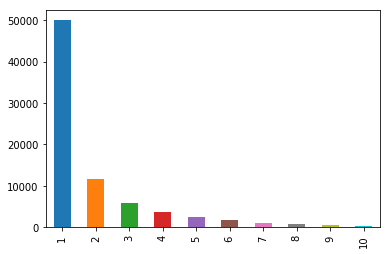

In [58]:
Search_Data['search_page'].value_counts().plot(kind='bar')

A great search algorithm should return all interesting and relevant results on the first page. Following this thought, I would like to define good search results as those in which users only visit one page, and normal search results as those in which users visit more than one page.

From the plot and percentage above, more search results are good ones.

In [50]:
Search_Data['search_quality'] = Search_Data['search_page'].apply(lambda x: 1 if x == '1' else 0)
Search_Data.head(3)

,checkin,checkout,MinPriceFilter,MaxPriceFilter,freeCancellation,stars_5,stars_4,stars_3,stars_2,stars_1,max_score,min_score,couponCode,adults,city,children,amenities,search_page,amenities_count,search_quality
0,2015-09-19,2015-09-20,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,4,NaN,3,"New York, NY, United States",NaN,NaN,1,0,1
1,2015-09-14,2015-09-15,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,4,NaN,3,"London, United Kingdom",NaN,NaN,1,0,1
2,2015-09-26,2015-09-27,NaN,175,NaN,NaN,yes,NaN,NaN,NaN,NaN,5,NaN,2,"New York, NY, United States",NaN,NaN,1,0,1


A new column 'search_quality' is added, in which 1 means good and 0 means normal.

In [53]:
Search_Data['city'].value_counts()

New York, NY, United States                 29384
London, United Kingdom                      28058
Hong Kong, Hong Kong                        11786
San Francisco, California, United States     8449
Name: city, dtype: int64

These search queries only contain four destination cities. / The city column in these search queries only contains four values.

In [56]:
Search_Data.groupby('city')['search_quality'].mean().sort_values(ascending=True)

city
London, United Kingdom                      0.526588
New York, NY, United States                 0.557616
Hong Kong, Hong Kong                        0.910826
San Francisco, California, United States    0.959285
Name: search_quality, dtype: float64

The ratio here indicates the proportion of good search results in each city. The larger the number is, the better the search results of that city are. I call this ratio as 'search quality index'.

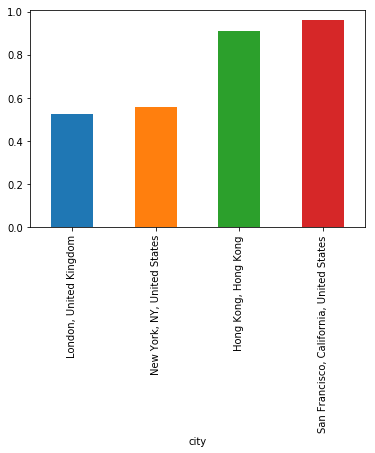

In [57]:
Search_Data.groupby('city')['search_quality'].mean().sort_values(ascending=True).plot(kind='bar')

London has the lowest search quality index. This indicates it has the worst search algorithm.